##### The latest version of this IPython notebook is available at [http://github.com/jckantor/CBE40455](http://github.com/jckantor/CBE40455)  for noncommercial use under terms of the [Creative Commons Attribution Noncommericial ShareAlike License](http://creativecommons.org/licenses/by-nc-sa/4.0/).

J.C. Kantor (Kantor.1@nd.edu)

# Assignment Problems

This Jupyter notebook demonstrates models for various types of assignment problems using GLPK/MathProg.

## Example Problem

You work as a logistics manager for a toy manufacturer, and you currently have five delivery trucks on the road. Your trucks are in Austin, Boston, Chicago, Denver, Edmonton, and Fargo. You need them to drive to five other cities: Atlanta, Boise, Charlotte, Dallas, and Fresno. The table below shows the distance in miles between these cities.

| From\To  | Atlanta | Boise    | Charlotte | Dallas | Fresno |
| : -----: | :-----: | :------: | :-------: | :----: | :----: |
| Austin   | 921     | 1627     | 1166      | 196    | 1594   |
| Boston   | 1078    | 2661     | 837       | 1767   | 3107   |
| Chicago  | 716     | 1693     | 756       | 925    | 2140   |
| Denver   | 1400    | 815      | 1561      | 788    | 1142   |
| Edmonton | 3764    | 1718     | 3848      | 3310   | 2835   |

Where should you send each of your trucks in order to minimize travel distance?

### Combinatorial Complexity

How many ways are there to assign destinations to each truck?

$N = 5 \times 4 \times 3 \times 2 \times 1 = 120$

In general there are 

$N = n!$ 

ways to assign $n$ resources to $n$ tasks.

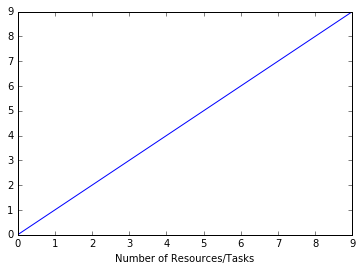

In [1]:
from pylab import *
%matplotlib inline

n = arange(0,10)
plot(n,n);
xlabel('Number of Resources/Tasks');

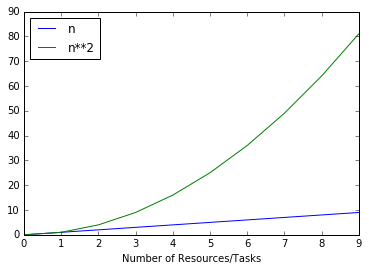

In [2]:
xlabel('Number of Resources/Tasks')
plot(n,n,n,n**2)
legend(['n','n**2'],loc='best');

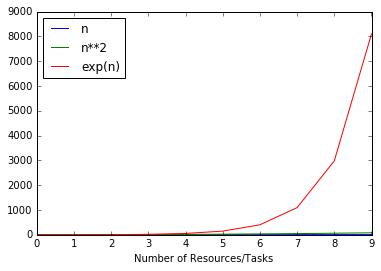

In [3]:
xlabel('Number of Resources/Tasks')
plot(n,n,n,n**2,n,exp(n))
legend(['n','n**2','exp(n)'],loc='best');

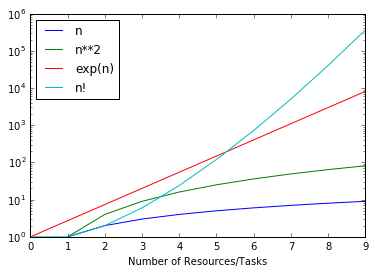

In [4]:
xlabel('Number of Resources/Tasks')
semilogy(n,n,n,n**2,n,exp(n),n,map(math.factorial,n))
legend(['n','n**2','exp(n)','n!'],loc='best');

### Types of Complexity

$$ Combinatoric >> Exponential >> Geometric >> Linear $$

Assignment problems can be incredibly difficult to solve. The speed of solution will depend on the exact details of the problem, what features can be left out without affecting the utility of the solution, and the availability of specialized algorithms.

## Formulation

Let _x[R,T]_ be a binary variable where _x[R,T] = 1_ means resource _R_ is assigned to task _T_. 

One resource must be assigned to each task. So for all $t\in TASKS$

$$\sum_{r \in RESOURCES} x[R,T] = 1$$  

Each resource must be assigned to one task. So for all $r\in RESOURCES$

$$\sum_{t \in TASKS} x[R,T] = 1$$  

In [5]:
%%writefile tmp/Assign.mod

set RESOURCES;
set TASKS;

param a {RESOURCES,TASKS} >= 0;

var x {RESOURCES,TASKS} binary;

minimize Cost: sum{r in RESOURCES, t in TASKS} a[r,t]*x[r,t];
subject to R {r in RESOURCES}: sum {t in TASKS} x[r,t] = 1;
subject to T {t in TASKS}: sum {r in RESOURCES} x[r,t] = 1;

solve;

printf "\n\n";
for {r in RESOURCES} {
   for {t in TASKS : x[r,t] == 1} {
      printf "Assign %10s   to %10s   Cost: %6.0f\n", r, t, a[r,t];
   }
}
printf "\n\n";

end;


Writing tmp/Assign.mod


## Solution

In [7]:
%%script glpsol -m tmp/Assign.mod -d /dev/stdin

set RESOURCES := Austin Boston Chicago Denver Edmonton ;
set TASKS := Atlanta Boise Charlotte Dallas Fresno ;
    
param a :   Atlanta	 Boise Charlotte Dallas Fresno :=
Austin       921     1627    1166      196   1594
Boston      1078     2661     837     1767   3107
Chicago      716     1693     756      925   2140
Denver      1400      815    1561      788   1142
Edmonton    3764     1718    3848     3310   2835 ;

end;

GLPSOL: GLPK LP/MIP Solver, v4.52
Parameter(s) specified in the command line:
 -m tmp/Assign.mod -d /dev/stdin
Reading model section from tmp/Assign.mod...
tmp/Assign.mod:23: warning: final NL missing before end of file
23 lines were read
Reading data section from /dev/stdin...
12 lines were read
Generating Cost...
Generating R...
Generating T...
Model has been successfully generated
GLPK Integer Optimizer, v4.52
11 rows, 25 columns, 75 non-zeros
25 integer variables, all of which are binary
Preprocessing...
10 rows, 25 columns, 50 non-zeros
25 integer variables, all of which are binary
Scaling...
 A: min|aij| =  1.000e+00  max|aij| =  1.000e+00  ratio =  1.000e+00
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 9
Solving LP relaxation...
GLPK Simplex Optimizer, v4.52
10 rows, 25 columns, 50 non-zeros
      0: obj =   1.211800000e+04  infeas =  3.000e+00 (1)
*     7: obj =   8.790000000e+03  infeas =  0.000e+00 (1)
*    17: obj =   4.6090000

## Example

A foreman has ﬁve workers and ﬁve jobs to complete. The
time in hours each worker needs to complete each job is shown in the following
table.

| Resource\Task | Job 1 | Job 2 | Job 3 | Job 4 | Job 5 |
| :-----------: | :---: | :---: | :---: | :---: | :---: |
| Worker 1      | 3     | 4     | 8     | 7     | 8     |
| Worker 2      | 2     | 5     | 3     | 2     | 6     |
| Worker 3      | 7     | 9     | 1     | 8     | 3     |
| Worker 4      | 5     | 3     | 4     | 6     | 6     |
| Worker 5      | 8     | 9     | 7     | 5     | 8     |

### What is the minimum time solution if one worker is assigned to each job?

In [8]:
%%script glpsol -m tmp/Assign.mod -d /dev/stdin

set RESOURCES := Worker_1 Worker_2 Worker_3 Worker_4 Worker_5 ;
set TASKS := Job_1 Job_2 Job_3 Job_4 Job_5 ;
    
param a : Job_1	Job_2 Job_3	Job_4 Job_5 :=
Worker_1	3	4	8	7	8
Worker_2	2	5	3	2	6
Worker_3	7	9	1	8	3
Worker_4	5	3	4	6	6
Worker_5	8	9	7	5	8 ;

end;

GLPSOL: GLPK LP/MIP Solver, v4.52
Parameter(s) specified in the command line:
 -m tmp/Assign.mod -d /dev/stdin
Reading model section from tmp/Assign.mod...
tmp/Assign.mod:23: warning: final NL missing before end of file
23 lines were read
Reading data section from /dev/stdin...
12 lines were read
Generating Cost...
Generating R...
Generating T...
Model has been successfully generated
GLPK Integer Optimizer, v4.52
11 rows, 25 columns, 75 non-zeros
25 integer variables, all of which are binary
Preprocessing...
10 rows, 25 columns, 50 non-zeros
25 integer variables, all of which are binary
Scaling...
 A: min|aij| =  1.000e+00  max|aij| =  1.000e+00  ratio =  1.000e+00
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 9
Solving LP relaxation...
GLPK Simplex Optimizer, v4.52
10 rows, 25 columns, 50 non-zeros
      0: obj =   2.800000000e+01  infeas =  3.000e+00 (1)
*     7: obj =   2.000000000e+01  infeas =  0.000e+00 (1)
*    11: obj =   1.7000000

### What is the minimum time solution if workers can be assigned multiple times?

In [9]:
%%script glpsol -m /dev/stdin

set RESOURCES;
set TASKS;

param a {RESOURCES,TASKS} >= 0;

var x {RESOURCES,TASKS} binary;

maximize Cost: sum{r in RESOURCES, t in TASKS} a[r,t]*x[r,t];
#subject to R {r in RESOURCES}: sum {t in TASKS} x[r,t] = 1;
subject to T {t in TASKS}: sum {r in RESOURCES} x[r,t] = 1;

solve;

printf "\n\n";
for {r in RESOURCES} {
   for {t in TASKS : x[r,t] == 1} {
      printf "Assign %10s   to %10s   Cost: %6.0f\n", r, t, a[r,t];
   }
}
printf "\n\n";

data;

set RESOURCES := Worker_1 Worker_2 Worker_3 Worker_4 Worker_5 ;
set TASKS := Job_1 Job_2 Job_3 Job_4 Job_5 ;
    
param a : Job_1	Job_2 Job_3	Job_4 Job_5 :=
Worker_1	3	4	8	7	8
Worker_2	2	5	3	2	6
Worker_3	7	9	1	8	3
Worker_4	5	3	4	6	6
Worker_5	8	9	7	5	8 ;

end;

GLPSOL: GLPK LP/MIP Solver, v4.52
Parameter(s) specified in the command line:
 -m /dev/stdin
Reading model section from /dev/stdin...
Reading data section from /dev/stdin...
35 lines were read
Generating Cost...
Generating T...
Model has been successfully generated
GLPK Integer Optimizer, v4.52
6 rows, 25 columns, 50 non-zeros
25 integer variables, all of which are binary
Preprocessing...
5 rows, 25 columns, 25 non-zeros
25 integer variables, all of which are binary
Scaling...
 A: min|aij| =  1.000e+00  max|aij| =  1.000e+00  ratio =  1.000e+00
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 5
Solving LP relaxation...
GLPK Simplex Optimizer, v4.52
5 rows, 25 columns, 25 non-zeros
*     0: obj =   3.700000000e+01  infeas =  0.000e+00 (0)
*     3: obj =   4.100000000e+01  infeas =  0.000e+00 (0)
OPTIMAL LP SOLUTION FOUND
Integer optimization begins...
+     3: mip =     not found yet <=              +inf        (1; 0)
+     3: >>>>>   4.100000

### Exercise

Suppose we want to assign just two workers. What is the minimum time solution using just two workers?

## Knapsack Problems

### Typical Applications

* Resource allocations with financial constraints
* Construction and scoring of a heterogenous test
* Selection of Capital Investments

### Example

Need to complete a set of jobs


|       | A | B | C | D  | E  | F | G |
|:-----:|:-:|:-:|:-:|:--:|:--:|:-:|:-:|
| Value | 7 | 9 | 5 | 12 | 14 | 6 | 12 |
| Time  | 3 | 4 | 2 | 6  | 7  | 3 | 5 |



In [10]:
%%script glpsol -m /dev/stdin

set ITEMS;

param value{ITEMS};
param cost{ITEMS};

var x {ITEMS} binary;

maximize Obj: sum{i in ITEMS} value[i]*x[i];
subject to C: sum{i in ITEMS} cost[i]*x[i] <= 12 ;

solve;

for {i in ITEMS}{
    printf "%3s  %2d\n",i,x[i];
}

data;

param : ITEMS : value cost :=
 A   7 3
 B   9 4
 C   5 2
 D  12 6
 E  14 7
 F   6 3
 G  12 5 ;
            
end;


GLPSOL: GLPK LP/MIP Solver, v4.52
Parameter(s) specified in the command line:
 -m /dev/stdin
Reading model section from /dev/stdin...
Reading data section from /dev/stdin...
29 lines were read
Generating Obj...
Generating C...
Model has been successfully generated
GLPK Integer Optimizer, v4.52
2 rows, 7 columns, 14 non-zeros
7 integer variables, all of which are binary
Preprocessing...
1 row, 7 columns, 7 non-zeros
7 integer variables, all of which are binary
Scaling...
 A: min|aij| =  2.000e+00  max|aij| =  7.000e+00  ratio =  3.500e+00
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 1
Solving LP relaxation...
GLPK Simplex Optimizer, v4.52
1 row, 7 columns, 7 non-zeros
*     0: obj =   0.000000000e+00  infeas =  0.000e+00 (0)
*     7: obj =   2.850000000e+01  infeas =  0.000e+00 (0)
OPTIMAL LP SOLUTION FOUND
Integer optimization begins...
+     7: mip =     not found yet <=              +inf        (1; 0)
Solution found by heuristic: 26
+  

### Exercise

| Investment | Location | Cost (millions) | Expected Profit |
| :--------: | :------: | :-------------: | :-------------: |
| 1 | Europe   | 10 | 1.0 |
| 2 | Europe | 8 | 0.9 |
| 3 | Europe | 8 | 0.9 |
| 4 | South America | 16 | 2.0 |
| 5 | South America | 12 | 1.4 |
| 6 | Africa | 4 | 0.2 |
| 7 | Africa | 6 | 0.5 |
| 8 | Africa | 16 | 2.1 |

The objective is to maximize the total expected profits subject to:

* Contractual commitments require at least 2 investments in Europe
* There must be one South American Investment
* No more than one African investment
* Total cost must be less than $40 million



